# 1. Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Data

In [3]:
path = r'/Users/golde/Instacart Basket Analysis/'

In [4]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_updated3.pkl'))

In [5]:
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income,merged
0,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,473747,1,3,3,12,21.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2254736,1,4,4,7,29.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,431534,1,5,4,15,28.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,3367565,1,6,2,7,19.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


There is personal identifiable information that we have to be aware of; first name, last name. 

In [6]:
# dropping first and last names for confidentality purporses

ords_prods_merged.drop(columns = ['first_name','last_name'])

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_type,frequency_flag,gender,state,age,date_joined,dependents,fam_status,income,merged
0,2398795,1,2,3,7,15.0,196,1,1,both,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,473747,1,3,3,12,21.0,196,1,1,both,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2254736,1,4,4,7,29.0,196,1,1,both,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,431534,1,5,4,15,28.0,196,1,1,both,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,3367565,1,6,2,7,19.0,196,1,1,both,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,467253,106143,25,6,16,7.0,19675,1,1,both,...,7.0,Frequenct Customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
30328759,156685,106143,26,4,23,5.0,19675,1,1,both,...,7.0,Frequenct Customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
30328760,1561557,66343,2,1,11,30.0,47210,1,1,both,...,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
30328761,276317,66343,3,6,15,19.0,47210,1,1,both,...,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [7]:
pd.options.display.max_rows = None

# 3. Create Regions

In [8]:
ords_prods_merged.loc[(ords_prods_merged['state'] == 'Maine') | (ords_prods_merged['state'] == 'New Hampshire') | (ords_prods_merged['state'] == 'Vermont') | (ords_prods_merged['state'] == 'Massachusetts') | (ords_prods_merged['state'] == 'Rhode Island') | (ords_prods_merged['state'] == 'Connecticut') | (ords_prods_merged['state'] == 'New York') | (ords_prods_merged['state'] == 'Pennsylvania'), 'region'] = 'Northeast'
ords_prods_merged.loc[(ords_prods_merged['state'] == 'Wisconsin') | (ords_prods_merged['state'] == 'Michigan') | (ords_prods_merged['state'] == 'Illinois') | (ords_prods_merged['state'] == 'Indiana') | (ords_prods_merged['state'] == 'Ohio') | (ords_prods_merged['state'] == 'North Dakota') | (ords_prods_merged['state'] == 'South Dakota') | (ords_prods_merged['state'] == 'Nebraska') | (ords_prods_merged['state'] == 'Kansas') | (ords_prods_merged['state'] == 'Minnesota') | (ords_prods_merged['state'] == 'Iowa') | (ords_prods_merged['state'] == 'Missouri'), 'region'] = 'Midwest'
ords_prods_merged.loc[(ords_prods_merged['state'] == 'Delaware') | (ords_prods_merged['state'] == 'Maryland') | (ords_prods_merged['state'] == 'District of Columbia') | (ords_prods_merged['state'] == 'Virginia') | (ords_prods_merged['state'] == 'West Virginia') | (ords_prods_merged['state'] == 'North Carolina') | (ords_prods_merged['state'] == 'South Carolina') | (ords_prods_merged['state'] == 'Georgia') | (ords_prods_merged['state'] == 'Florida') | (ords_prods_merged['state'] == 'Kentucky') | (ords_prods_merged['state'] == 'Tennessee') | (ords_prods_merged['state'] == 'Mississippi') | (ords_prods_merged['state'] == 'Alabama') | (ords_prods_merged['state'] == 'Oklahoma') | (ords_prods_merged['state'] == 'Texas') | (ords_prods_merged['state'] == 'Arkansas') | (ords_prods_merged['state'] == 'Louisiana'), 'region'] = 'South'
ords_prods_merged.loc[(ords_prods_merged['state'] == 'Idaho') | (ords_prods_merged['state'] == 'Montana') | (ords_prods_merged['state'] == 'Wyoming') | (ords_prods_merged['state'] == 'Nevada') | (ords_prods_merged['state'] == 'Utah') | (ords_prods_merged['state'] == 'Colorado') | (ords_prods_merged['state'] == 'Arizona') | (ords_prods_merged['state'] == 'New Mexico') |  (ords_prods_merged['state'] == 'Alaska') | (ords_prods_merged['state'] == 'Washington') | (ords_prods_merged['state'] == 'Oregon') | (ords_prods_merged['state'] == 'California') | (ords_prods_merged['state'] == 'Hawaii'), 'region'] = 'West'

In [8]:
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,last_name,gender,state,age,date_joined,dependents,fam_status,income,merged,region
0,2398795,1,2,3,7,15.0,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,473747,1,3,3,12,21.0,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2254736,1,4,4,7,29.0,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,431534,1,5,4,15,28.0,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,3367565,1,6,2,7,19.0,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


# 4. Create Region Graph

In [9]:
#data frame with regions and spending flag
df = ords_prods_merged.loc[:,['region','spender_flag']]

In [10]:
df.head()

,region,spender_flag
0,South,Low Spender
1,South,Low Spender
2,South,Low Spender
3,South,Low Spender
4,South,Low Spender


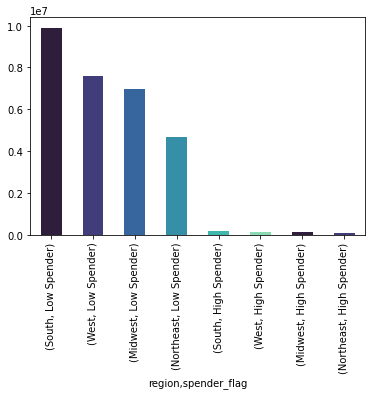

In [11]:
# Bar graph for region
region_bar = df.value_counts().plot.bar(color=sns.color_palette("mako"))

# 5. Exclusion Flag

In [9]:
#Create Exclusion Flag
ords_prods_merged.loc[ords_prods_merged['max_order'] >= 5, 'exclusion_flag'] = 'High Activity'
ords_prods_merged.loc[ords_prods_merged['max_order'] < 5, 'exclusion_flag'] = 'Low Activity'

In [10]:
#exclude low activity customers from new df
df_new = ords_prods_merged[ords_prods_merged['max_order'] > 5]

In [14]:
#export new data 
df_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged_updated4.pkl'))

# 6. Customer Profiling

In [15]:
# Create customer profiles for new marketing strategy. Their status with what they buy. Age-dept
crosstab_age = pd.crosstab(df_new['age'], df_new['department_id'], dropna = False)
crosstab_age.to_clipboard()

In [16]:
#Age-time
crosstab_age_time = pd.crosstab(df_new['age'], df_new['hour_of_day_ordered'], dropna = False)
crosstab_age_time.to_clipboard()

In [17]:
#Age-day
crosstab_age_day = pd.crosstab(df_new['age'], df_new['orders_day_of_week'], dropna = False)
crosstab_age_day.to_clipboard()

In [18]:
#Income-Dept
crosstab_inc_dept = pd.crosstab(df_new['income'], df_new['department_id'], dropna = False)
crosstab_inc_dept.to_clipboard()

In [19]:
#income-time
crosstab_inc_time = pd.crosstab(df_new['income'], df_new['hour_of_day_ordered'], dropna = False)
crosstab_inc_time.to_clipboard()

In [20]:
#income-day
crosstab_inc_day = pd.crosstab(df_new['income'], df_new['orders_day_of_week'], dropna = False)
crosstab_inc_day.to_clipboard()

In [21]:
#family status-dept id
crosstab_fam_dept = pd.crosstab(df_new['fam_status'], df_new['department_id'], dropna = False)
crosstab_fam_dept.to_clipboard()

In [22]:
#Family status that spends the most
crosstab_fam_spend = pd.crosstab(df_new['prices'].sum(), df_new['fam_status'], dropna = False)
crosstab_fam_spend.to_clipboard()

In [23]:
#Fam status-day
crosstab_fam_day = pd.crosstab(df_new['fam_status'], df_new['orders_day_of_week'], dropna = False)
crosstab_fam_day.to_clipboard()

In [24]:
#Dept that generated most revenue
crosstab_price_dept = pd.crosstab(df_new['prices'].sum(), df_new['department_id'], dropna = False)
crosstab_price_dept.to_clipboard()

In [25]:
#Customer frequency spending more
crosstab_freq_spend = pd.crosstab(df_new['prices'].sum(), df_new['frequency_type'], dropna = False)
crosstab_freq_spend.to_clipboard()

In [26]:
#customer frequency determine items purchased
crosstab_freq_dept = pd.crosstab(df_new['department_id'], df_new['frequency_type'], dropna = False)
crosstab_freq_dept.to_clipboard()

In [27]:
#Family size spending habits
crosstab_family_spend = pd.crosstab(df_new['prices'].sum(), df_new['dependents'], dropna = False)
crosstab_family_spend.to_clipboard()

In [28]:
#Key departments with n_dependants
crosstab_depend_dept = pd.crosstab(df_new['department_id'], df_new['dependents'], dropna = False)
crosstab_depend_dept.to_clipboard()

In [29]:
#Flag income level
df_new.loc[df_new['income'] <= 50000, 'income_level'] = 'low_income'
df_new.loc[(df_new['income'] <=100000) & (df_new['income'] > 50000), 'income_level'] = 'mid_income'
df_new.loc[df_new['income'] > 100000, 'income_level'] = 'high_income'

/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [30]:
df_new.tail()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,dependents,fam_status,income,merged,region,exclusion_flag,income_level
30328755,3308056,106143,22,4,20,10.0,19675,1,1,both,...,Hawaii,25,5/26/2017,0,single,53755,both,West,High Activity,mid_income
30328756,2988973,106143,23,2,22,5.0,19675,1,1,both,...,Hawaii,25,5/26/2017,0,single,53755,both,West,High Activity,mid_income
30328757,930,106143,24,6,12,4.0,19675,1,1,both,...,Hawaii,25,5/26/2017,0,single,53755,both,West,High Activity,mid_income
30328758,467253,106143,25,6,16,7.0,19675,1,1,both,...,Hawaii,25,5/26/2017,0,single,53755,both,West,High Activity,mid_income
30328759,156685,106143,26,4,23,5.0,19675,1,1,both,...,Hawaii,25,5/26/2017,0,single,53755,both,West,High Activity,mid_income


In [31]:
df_new['income_level'].value_counts(dropna = False)

high_income    13176119
mid_income     12415582
low_income      3076853
Name: income_level, dtype: int64

In [32]:
#double check prices, looks like 4.9 fix did not save, but scatterplot visualization is OK. 
ords_prods_merged['prices'].max()

99999.0

In [33]:
df_new.loc[df_new['prices'] > 100, 'prices'] = np.nan

/Users/golde/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
#Check, Suggested formula seems to set individual prices. 
ords_prods_merged['prices'].max()

99999.0

In [35]:
#income level-spending
crosstab_inc_lev_spend = pd.crosstab(df_new['prices'].mean(), df_new['income_level'])
crosstab_inc_lev_spend.to_clipboard()

# 7. Visualizations

<AxesSubplot:xlabel='prices', ylabel='prices'>

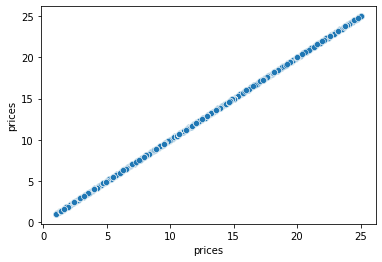

In [36]:
#See what price check visualization looks like 
sns.scatterplot(x= 'prices', y = 'prices', data = df_new)

In [37]:
#Assign random numbers, create list of true/ false values 
dev = np.random.rand(len(df_new)) <= 0.7

In [38]:
#Store 70% in big
big = df_new[dev]

In [39]:
#store 30% in small
small = df_new[~dev]

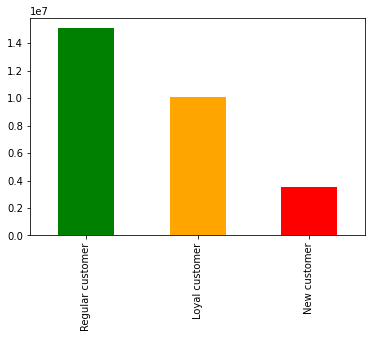

In [40]:
#Customer Loyalty
loyal_bar = df_new['loyalty_flag'].value_counts().plot.bar(color = ['green', 'orange', 'red'])

In [41]:
#Export graph
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_bar4.png'))

In [42]:
#Subgroup Loyalty, department id
loyalty_dept_bar = df_new.groupby(['department_id', 'loyalty_flag'])['department_id'].count().unstack('loyalty_flag').fillna(0)

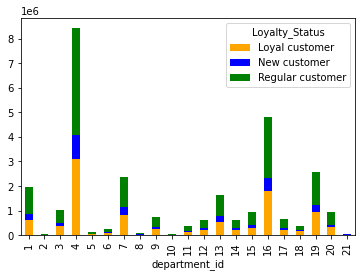

In [43]:
#Edited visual of graph 
loyalty_dept_bar = loyalty_dept_bar.plot.bar(stacked = True, color = ['orange', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [44]:
#Export graph
loyalty_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dept_bar.png'))

In [45]:
#loyalty-Dept
crosstab_loyalty_dept = pd.crosstab(df_new['loyalty_flag'], df_new['department_id'], dropna = False)

In [46]:
#table
crosstab_loyalty_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,597620,10536,372925,3089439,38081,76785,840147,25011,237845,13595,...,198741,550138,217325,289296,1797296,193428,164126,925573,317771,18336
New customer,269107,4181,124816,974714,19967,31603,289941,11405,104590,3102,...,81313,216054,77033,130541,545234,92726,34563,301458,114810,9781
Regular customer,1079894,17041,540152,4368605,72932,126662,1255601,49268,412110,14805,...,341951,875037,325180,510695,2467795,355591,187091,1339661,494420,33317


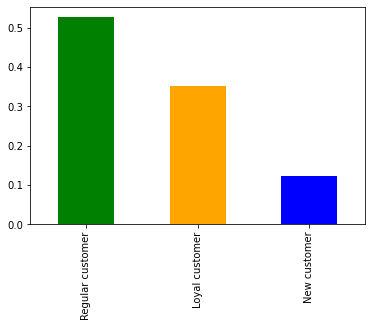

In [47]:
#Loyalty status affects amount spent
loyal_price_bar = df_new['loyalty_flag'].value_counts('prices').plot.bar(color = ['green', 'orange', 'blue'])

In [48]:
#Export graph
loyal_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_price_bar.png'))

In [49]:
#loyalty-time
crosstab_loyalty_time = pd.crosstab(df_new['loyalty_flag'], df_new['hour_of_day_ordered'], dropna = False)

In [50]:
crosstab_loyalty_time

hour_of_day_ordered,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,60572,29534,17422,13138,16438,28785,110853,340049,632179,866563,...,820988,795167,729308,574401,441121,354077,303314,259507,201996,120921
New customer,25398,15185,8831,6857,6119,9155,25479,74479,152221,229426,...,298601,301744,292357,249569,195820,145841,106345,82167,66556,42875
Regular customer,105179,55823,33533,24533,23977,40449,127736,396133,768898,1110265,...,1257051,1246796,1202167,999431,788013,595523,448976,366643,293465,191204


In [51]:
crosstab_loyalty_time.T

loyalty_flag,Loyal customer,New customer,Regular customer
hour_of_day_ordered,,,
0,60572,25398,105179
1,29534,15185,55823
2,17422,8831,33533
3,13138,6857,24533
4,16438,6119,23977
5,28785,9155,40449
6,110853,25479,127736
7,340049,74479,396133
8,632179,152221,768898


In [52]:
#save transposed
crosstab_loyalty_time_T = crosstab_loyalty_time.T

In [53]:
crosstab_loyalty_time.to_clipboard()

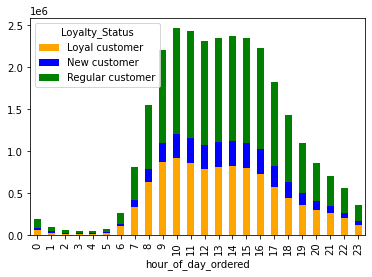

In [54]:
#create graph
loyalty_time_bar_T = crosstab_loyalty_time_T.plot.bar(stacked= True, color = ['orange', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [55]:
#Export graph
loyalty_time_bar_T.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_time_bar_T.png'))

In [56]:
#Loyalty ordering habits-Day
crosstab_loyal_day = pd.crosstab(df_new['loyalty_flag'], df_new['orders_day_of_week'], dropna = False)
crosstab_loyal_day.to_clipboard()

In [57]:
crosstab_loyal_day.T

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1717918,714447,3004813
1,1809749,597228,2611435
2,1330526,454100,1946059
3,1246650,407884,1751519
4,1270311,391013,1710199
5,1431148,429195,1892196
6,1289079,497615,2165470


In [58]:
#save transposed
crosstab_loyal_day_T=crosstab_loyal_day.T

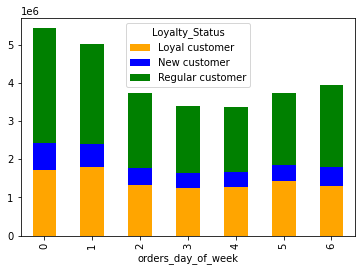

In [59]:
#create graph
loyalty_day_bar = crosstab_loyal_day_T.plot.bar(stacked= True, color = ['orange', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [60]:
#Export graph
loyalty_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_day_bar.png'))

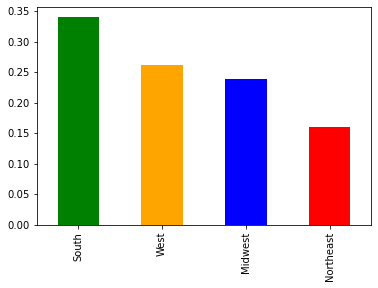

In [61]:
#Crosstab region-population
region_users_bar = df_new['region'].value_counts('prices').plot.bar(color = ['green', 'orange', 'blue', 'red'])

In [62]:
#Export graph
region_users_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_users_bar.png'))

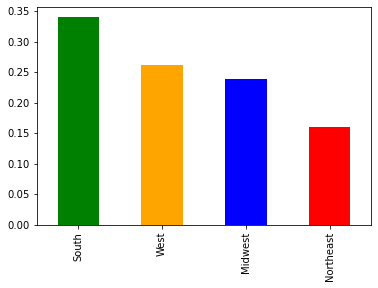

In [63]:
#Loyalty status affects amount spent
region_price_bar = df_new['region'].value_counts('prices').plot.bar(color = ['green', 'orange', 'blue', 'red'])

In [64]:
#Export graph
region_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_price_bar.png'))

In [65]:
#Region- Order hour
crosstab_region_time = pd.crosstab(df_new['region'], df_new['hour_of_day_ordered'], dropna = False)

In [66]:
crosstab_region_time.T

region,Midwest,Northeast,South,West
hour_of_day_ordered,,,,
0,44214,29648,64173,49377
1,23485,16876,33229,25100
2,14786,9695,18796,15413
3,10205,7170,15182,11078
4,11170,7403,15770,11400
5,17576,12328,27604,19516
6,61148,41198,90063,66711
7,189904,129645,270259,205822
8,359617,245114,524545,393887


In [67]:
crosstab_region_time_T = crosstab_region_time.T

In [68]:
crosstab_region_time_T.to_clipboard()

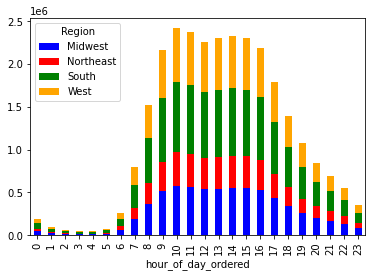

In [69]:
#create graph
region_time_bar = crosstab_region_time_T.plot.bar(stacked= True, color = ['blue', 'red', 'green', 'orange'])
plt.legend(title='Region')

In [70]:
#Export graph
region_time_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_time_bar.png'))

In [71]:
#Regional ordering habits-Day
crosstab_Region_day = pd.crosstab(df_new['region'], df_new['orders_day_of_week'], dropna = False)
crosstab_Region_day.to_clipboard()

In [72]:
crosstab_region_day_T = crosstab_Region_day.T

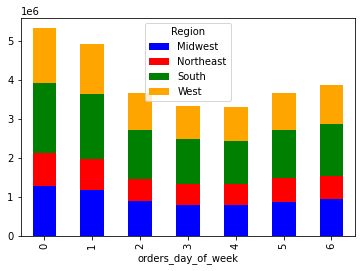

In [73]:
#create graph
region_day_bar = crosstab_region_day_T.plot.bar(stacked= True, color = ['blue', 'red', 'green', 'orange'])
plt.legend(title='Region')

In [74]:
#Export graph
region_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_day_bar.png'))

In [75]:
#Frequency of purchases viewed by region and loyalty
region_loyalty_freq = df_new.groupby(['region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

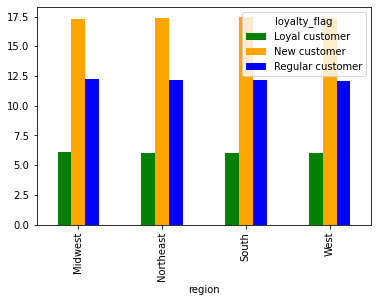

In [76]:
region_loyalty_bar = region_loyalty_freq.plot.bar(color = ['green', 'orange', 'blue'])

In [77]:
#Export graph
region_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loyalty_bar.png'))

In [78]:
#create subset for age-dept_id chart
#plot age-dept id-tried a couple of graphs: processing time was long and will need to create age groups for bar graph to be legible.
df_1 = small[['age', 'department_id']]

In [79]:
#Create subset for age-price
df_age_price = small[['age', 'prices']]

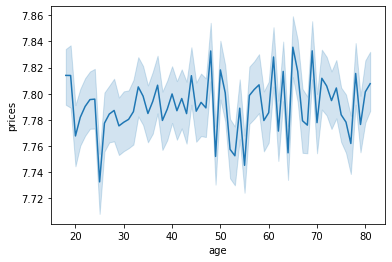

In [112]:
#Plot Age-price
Line_age_Prices = sns.lineplot(data = df_age_price, x = 'age', y = 'prices')

In [113]:
#Export graph
Line_age_Prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_prices.png'))

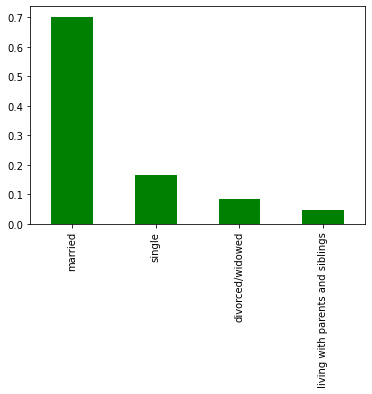

In [114]:
#Family status vs amount spent
fam_price_bar = df_new['fam_status'].value_counts('prices').plot.bar(color = ['green'])

In [115]:
#Export graph
fam_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_price_bar.png'))

In [116]:
#Relate age to family status
crosstab_fam_status_spend = pd.crosstab(df_new['spender_flag'],df_new['fam_status'], dropna=False )
crosstab_fam_status_spend

fam_status,divorced/widowed,living with parents and siblings,married,single
spender_flag,,,,
High Spender,47015,25863,394848,88183
Low Spender,2403170,1347065,19736406,4626004


In [117]:
crosstab_fam_status_spend.to_clipboard()

In [118]:
crosstab_age_fam = pd.crosstab(df_new['fam_status'],df_new['age'], dropna=False )
crosstab_age_fam.T 

fam_status,divorced/widowed,living with parents and siblings,married,single
age,,,,
18,0,333134,0,110094
19,0,362184,0,97358
20,0,332829,0,110820
21,0,344781,0,108824
22,0,0,335239,120085
23,0,0,344177,112698
24,0,0,346735,102502
25,0,0,296430,118403
26,0,0,346511,106726


In [119]:
crosstab_age_fam_t = crosstab_age_fam.T  

In [120]:
crosstab_age_fam_t.to_clipboard()

In [ ]:
#fam status-hour
crosstab_fam_hour = pd.crosstab(df_new['fam_status'], df_new['hour_of_day_ordered'], dropna = False)
crosstab_fam_hour.to_clipboard()

In [ ]:
crosstab_fam_hour.T

In [ ]:
crosstab_fam_hour_t = crosstab_fam_hour.T

In [ ]:
#graph family status with hour of day
fam_hour_bar = crosstab_fam_hour_t.plot.bar(stacked= True, color = ['blue', 'red', 'green', 'orange'])

In [ ]:
#Export graph
fam_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_hour_bar.png'))

In [ ]:
#Subgroup dependents, department_id
depend_dept_bar = df_new.groupby(['department_id', 'dependents'])['department_id'].count().unstack('dependents')

In [ ]:
#Plot dependants-dept_id
depend_dept_bar = depend_dept_bar.plot(kind = 'bar', stacked = True)

In [ ]:
#Export graph
depend_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depend_dept_bar.png'))

In [ ]:
#Subgroup items purchased based off family status
sub_fam_items = df_new.groupby(['department_id', 'fam_status'])['department_id'].count().unstack('fam_status').fillna(0)

In [ ]:
#Stacked bar chart items from each department based off family status
sub_fam_items = sub_fam_items.plot(kind = 'bar', stacked = True)

In [ ]:
#Export graph
sub_fam_items.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sub_fam_items.png'))

In [ ]:
#Rank Department usage
bar_dept_use = df_new['department_id'].value_counts().plot.bar()

In [ ]:
#Export graph
bar_dept_use.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_use.png'))

In [ ]:
#Income level-amount ordered
bar_income_order = df_new['income_level'].value_counts().plot.bar()

In [ ]:
#Export graph
bar_income_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_order.png'))

# 8. Aggregate Users By Expenditure & Frequency

In [ ]:
# Aggregate Min, mean, Max on customer profile level for expenditure
df_new.groupby('user_id').agg({'prices' : ['min', 'mean', 'max']})

In [ ]:
# Aggregate Min, mean, Max on customer profile level for usage frequency
df_new.groupby('user_id').agg({'days_since_prior_order' : ['min', 'mean', 'max']})

In [121]:
#Regional comparison of customer profiles. 
Sbar_region = df_new.groupby(['department_id', 'region'])['department_id'].count().unstack('region').fillna(0)

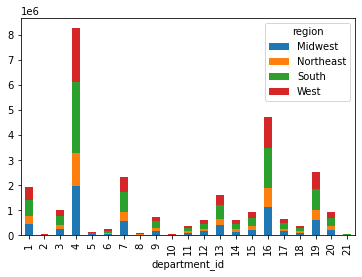

In [122]:
# create graph
sbar = Sbar_region.plot(kind = 'bar', stacked = True)

In [123]:
#Export graph
sbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar.png'))

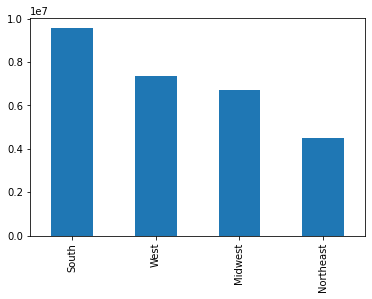

In [124]:
#Number items purchased by region
bar_region_items = df_new['region'].value_counts().plot.bar()

In [125]:
#Export graph
bar_region_items.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_items.png'))

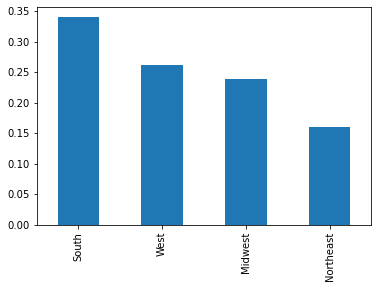

In [126]:
#Amount each region spends
bar_region_spend = df_new['region'].value_counts('prices').plot.bar()

In [127]:
#Export graph
bar_region_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spend.png'))

In [128]:
#Customer loyalty per region
Sbar_loyal_region = df_new.groupby(['region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

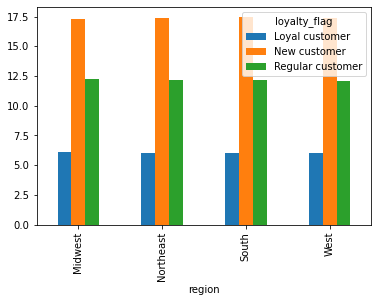

In [129]:
#create graph
sbar_loyal_region = Sbar_loyal_region.plot(kind = 'bar', stacked = False)

In [131]:
#Export graph
sbar_loyal_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_region.png'))

In [ ]:
ords_prods_merged.value_counts()